# Car Price Prediction using Linear Regression

  Using Linear Regression(ordinary least square method) to predict Bike price


# **About Dataset**

# **There are 8 variables in the dataset.**
#### 1.Brand-manufactoring company
#### 2.model-model of bike
#### 3.selling_price-selling price of bike
#### 4.year-year of manufacturing
#### 5.KM_Driven-total km driven
#### 6.Fuel-type of fuel used in car
#### 7.seller_Type=type of selller
#### 8.Transmission-type of transmission in car
####  9.Owner-whether current owner is first or he repurchased

# Import Library

In [1]:
import pandas as pd

In [6]:
import numpy as np

# Import Data

In [47]:
df=pd.read_csv('E:\ketan user data\Downloads\CarPrice.csv')

# Data Information

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


# Describe data

In [49]:
df.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# Getting the first five rows of Dataframe

In [50]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Get categories and counts of categorical values

In [51]:
df[['Brand']].value_counts()

Brand        
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Ambassador          4
Volvo               4
Jeep                3
OpelCorsa           2
MG                  2
Isuzu               1
Force               1
Daewoo              1
Kia                 1
dtype: int64

In [52]:
df[['Model']].value_counts()

Model                               
Maruti Swift Dzire VDI                  69
Maruti Alto 800 LXI                     59
Maruti Alto LXi                         47
Hyundai EON Era Plus                    35
Maruti Alto LX                          35
                                        ..
Mahindra KUV 100 G80 K4 Plus             1
Mahindra KUV 100 mFALCON D75 K8          1
Mahindra KUV 100 mFALCON D75 K8 AW       1
Mahindra KUV 100 mFALCON G80 K2 Plus     1
Volvo XC60 D5 Inscription                1
Length: 1491, dtype: int64

# Column Names


In [53]:
df.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# Shape of DataFrame

In [54]:
df.shape

(4340, 9)

# Encoding of categorical features

In [109]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

In [110]:
df.replace({'Fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

In [145]:
df.replace({'Owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [146]:
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [147]:
#x=pd.get_dummies(x,columns=['Fuel','Seller_Type','Transmission','Owner'],drop_first=True)

# Target variable(y) and Feature variable(x)

In [148]:
y=df['Selling_Price']

In [149]:
y.shape

(4340,)

In [150]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: Selling_Price, Length: 4340, dtype: int64

In [151]:
x=df[['Year','KM_Driven','Fuel','Seller_Type','Transmission','Owner']]

In [152]:
x

,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1
...,...,...,...,...,...,...
4335,2014,80000,1,0,0,1
4336,2014,80000,1,0,0,1
4337,2009,83000,0,0,0,1
4338,2016,90000,1,0,0,0


In [153]:
#x=df.drop(['Brand','Model','Selling_Price'],axis=1)

# Train-Test-split

In [154]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2529)

In [155]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3038, 6), (1302, 6), (3038,), (1302,))

# Modeling

In [156]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [157]:
model.fit(x_train,y_train)

LinearRegression()

# Model Prediction

In [158]:
y_pred=model.predict(x_test)

In [159]:
y_pred.shape

(1302,)

In [160]:
y_pred

array([502458.82786413, 646333.17428704, 521962.74075836, ...,
       620183.32683781, 315403.8278857 , 731862.54196037])

# Model Evaluation


In [163]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [164]:
mean_absolute_error(y_test,y_pred)

228808.95522977872

In [166]:
mean_squared_error(y_test,y_pred)

193242972302.19553

In [167]:
r2_score(y_test,y_pred)

0.4075563394370839

# Visualization of Actual and Predicted results

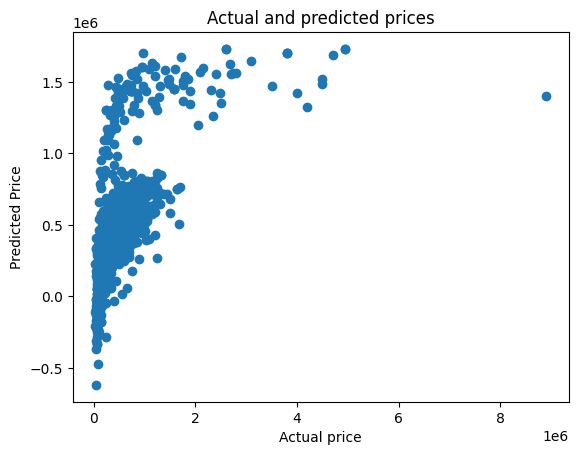

In [168]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual and predicted prices')
plt.show()

# Future Prediction

In [169]:
df_new=df.sample(1)

In [170]:
df_new.shape

(1, 9)

In [171]:
df_new

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
3828,Maruti,Maruti S-Cross Alpha DDiS 200 SH,2016,790000,22000,1,1,0,0


In [172]:
x_new=df.drop(['Brand','Model','Selling_Price'],axis=1)

In [174]:
y_pred_new=model.predict(x_new)

In [175]:
y_pred_new

array([ 35370.27293821,  48662.14204817, 429186.7878262 , ...,
        91547.56411824, 593599.58861791, 410283.52563579])